# Analysis and Visualization of UK Road Accident Data (2019)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 2.7 MB/s 


In [3]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [4]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 42.7 MB/s 
     |████████████████████████████████| 6.3 MB 32.5 MB/s 


In [6]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Project Background
Date Source: https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

All road traffic accidents involving casualties are logged and reported in the United Kingdom, along with (probably) a majority of other non-fatal road traffic accidents. Every year, the government releases a large batch of data associated with these reports. In this assignment, we will be using the data from 2019 as it represents a very complete sample with a lot of ancillary data available. The data used for this analysis and visualization task are:

1.  Brief-guide-to-road-accidents-and-safety-data. This file contains a very short introduction to the data set produced by the government.
2.   Variable lookup. This spreadsheet details the large amount of variables present in each of the datasets.

3.   Road Safety Data - Accidents 2019. This spreadsheet contains the details of the accidents logged in 2019.
4.   Road Safety Data - Casualties 2019. This spreadsheet details the casualties contained in the logged accidents.

5. Road Safety Data - Vehicles 2019. This spreadsheet contains the details of the vehicles involved in the accidents.

The questions that this assignment will be addressing are as follows:


1. Are there significant days of the week on which accidents occur?
2. Are there significant hours of the day on which accidents occur?
3. Are there significant months of the year on which accidents occur?
4. What are the variables with the most and least correlation to accident severity?
5. For motorbikes, are there significant hours of the day on which accidents occur?
6. For Motorbikes, are there significant days of the week on which accidents occur?
7. For Motorbikes, which type of motorbike has the highest occurence of accident?
8. For motorbikes, are there significant months of the year on which accidents occur?
9. For pedestrians involved in accidents, are there significant hours of the day and days of the week, on which they are more liekly to be involved in accidents?
10. For pedestrians involved, are there significant days of the week, on which they are more likely to be involved in accidents?
11. What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?
12. What impact, if any, does sunrise and sunset have on road traffic accidents?
13. How does driver related variables affect the outcome (e.g., age of the driver)?
14. Can we predict the hour accident will occur in the UK?
15. Can we predict where accidents will happen?






In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import geopandas as gpd
import folium
from geopy.geocoders import Nominatim
from folium import plugins
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.linear_model import LinearRegression
from dmba import backward_elimination, forward_selection, AIC_score, regressionSummary

warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.simplefilter("ignore")
pd.set_option("display.max_columns", None)
np.random.seed(42)
%matplotlib inline

no display found. Using non-interactive Agg backend


In [8]:
#UK road accident data 2019
accident = pd.read_csv("/content/drive/MyDrive/Big Data Road Safety/Road Safety Data - Accidents 2019.csv", parse_dates = ["Date", "Time"], low_memory = False)

#UK road casualty data 2019
casualty = pd.read_csv("/content/drive/MyDrive/Big Data Road Safety/Road Safety Data - Casualties 2019.csv", low_memory = False)

#UK vehicle data 2019
vehicle = pd.read_csv("/content/drive/MyDrive/Big Data Road Safety/Road Safety Data- Vehicles 2019.csv", low_memory = False)

### Description of the dataset

__Accident Data__





In [9]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117536 non-null  object        
 1   Location_Easting_OSGR                        117508 non-null  float64       
 2   Location_Northing_OSGR                       117508 non-null  float64       
 3   Longitude                                    117508 non-null  float64       
 4   Latitude                                     117508 non-null  float64       
 5   Police_Force                                 117536 non-null  int64         
 6   Accident_Severity                            117536 non-null  int64         
 7   Number_of_Vehicles                           117536 non-null  int64         
 8   Number_of_Casualties                         117536 non-null  in

>*The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)*

In [10]:
accident.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

>*columns with missing data include: Location_Easting_OSRG, Location_Northing_OSRG, Longitude, Latitude, Time and LSOA_of_Accident_Location*

In [11]:
accident.shape

(117536, 32)

>*The accident dataset has 117, 536 rows and 32 columns*

**Casualty Dataset**

In [12]:
casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

In [13]:
casualty.isna().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

>*The casualty data has no missing values*

In [14]:
casualty.shape

(153158, 16)

>*The casualty dataset has 153, 158 rows and 16 columns*

__Vehicle Dataset__

In [15]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

In [16]:
vehicle.isna().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

In [17]:
vehicle.shape

(216381, 23)

>*The vehicle dataset has 216, 381 rows and 23 columns*

**Data Exploration**

In [18]:
accident.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,2,2022-11-22 17:50:00,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,3,2022-11-22 21:45:00,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,3,2022-11-22 01:50:00,2,E09000007,4,504,6,30,3,4,6,0,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,3,2022-11-22 01:20:00,2,E09000007,4,510,6,20,3,4,4,510,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,3,2022-11-22 00:40:00,28,E09000005,3,4003,6,30,6,4,6,0,0,0,4,1,1,0,0,1,1,E01000546


In [19]:
vehicle.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,4,1,4


In [20]:
casualty.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


####  Treating the Missing Values in Latitude and Longitude, Data Cleaning, Preprocessing, and Feature Engineering.

>*I did a little search on google map by getting the names of some locations with their respective latitude and longitudes from the accident data. I then compared the distance of those locations to the locations of the Police_Force and Local_Authority_(District)using their actual labels. My research showed that Local_Authority_(District) was closer to the names of those locations having latitude and longitude. Hence, we apply this method to fill missing values for latitude and longitude.*

In [21]:
fea_loc = accident[accident['Latitude'].isna() | accident['Longitude'].isna()] #Filter out rows with missing values for Latitude and Longitude and assign them to a different dataframe

fea_loc['Local_Authority_(District)_Area'] = fea_loc['Local_Authority_(District)'].replace({114: "Wigan UK", 
           95: "Wirral UK", 
           91: "Liverpool UK", 
           130: "Cheshire West and Chester UK", 
           128: "Warrington UK", 
           129: "Cheshire East UK", 
           187: "Selby UK", 
           185: "Ryedale UK", 
           182: "Harrogate UK", 
           186: "Scarborough UK", 
           181: "Hambleton UK", 
           206: "Wakefield UK", 
           233: "North East Lincolnshire UK",
           292: "Rugby UK",
           544: "Medway UK",
           557: "Adur UK",
           645: "West Dorset UK",
           724: "Flintshire UK",
           741: "Cardiff UK",
           753: "Powys UK",
           })

'''
**Get/Lat/Long Data with GeoPy**
----------------------------------
the code below calls a geopy API using the column	Local_Authority_(District)_Area values. We use this column as a query key to pull back corresponding lat/long coordinates
'''
geolocator = Nominatim(user_agent="RTA")

for i in fea_loc.index:
  try:
    location = geolocator.geocode(fea_loc['Local_Authority_(District)_Area'][i])
    fea_loc.loc[i, 'Latitude'] = location.latitude
    fea_loc.loc[i, 'Longitude'] = location.longitude
  except:
    fea_loc.loc[i, 'Latitude'] = ""
    fea_loc.loc[i, 'Longitude'] = ""


fea_loc.drop(['Local_Authority_(District)_Area'], axis = 1, inplace = True) ##We drop the engineered column after use
accident_fea = accident[accident['Longitude'].notnull() | accident['Latitude'].notnull()] #We exclude rows that contain NaN values for Latitude and Longitude and create a new dataframe
accident = pd.concat([accident_fea, fea_loc], axis = 0) ##We concatenate fea_loc with accident_fea after filling the missing values for Lat and Long in dataframe fea_loc
accident.reset_index(drop = True, inplace = True)

##Reformat the time variable in accident data
accident['Time'] = pd.to_datetime(accident['Time'], format='%I:%M:%S %p').dt.strftime('%H:%M:%S')

'''Replace -1 with NaN and we fill missing data using mean for numeric variables.'''

def df_col_treatment(df):
  for col in df.select_dtypes(include = ['int64','float64']).columns:
    df[col] = df[col].replace(-1, np.NaN) 
    s_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    df[s_col] = df[s_col].apply(lambda x: x.fillna(x.mode().iloc[0], axis=0))
  return df


#Applying the above defined function to accident, casualty and vehicle data
df_col_treatment(accident)
df_col_treatment(casualty)
df_col_treatment(vehicle)

#We treat the missing values in the Time column in accident_df data differently as we use the forward fill method to handle missing values
accident['Time'].fillna(method = 'ffill', inplace = True)

#S01007575 used to fill missing values in LSOA_of_Accident_Location
accident['LSOA_of_Accident_Location'] = accident['LSOA_of_Accident_Location'].fillna('S01007575')

#Feature Enginnering
accident['Day_Name'] = accident['Day_of_Week'].replace({1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"}) #We engineer a Day_Name column using the Day_of_Week labels provided
accident['Acc_Hour'] = pd.to_datetime(accident['Time'], format = '%H:%M:%S').dt.hour #Creating the hour variable.
accident['_Month'] = pd.to_datetime(accident['Date']).dt.month
accident['_Week'] = pd.to_datetime(accident['Date']).dt.weekofyear
accident['_Minute'] = pd.to_datetime(accident['Time']).dt.minute
accident['_Day'] = pd.to_datetime(accident['Date']).dt.day

In [22]:
accident.isna().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

>*As seen in the table above, all missing values in the accident data have been appropriately filled*

>*For this task, we employ the use of visualization techniques such as bar charts, scatter plot, kernel density estimation and correlation matrix. The two primary methods for data analysis employed includes qualitative and quantitative data analysis techniques.*

## Exploratory Data Analysis and Answers to Business Questions

__Question 1: Are there significant days of the week on which accidents occur?__

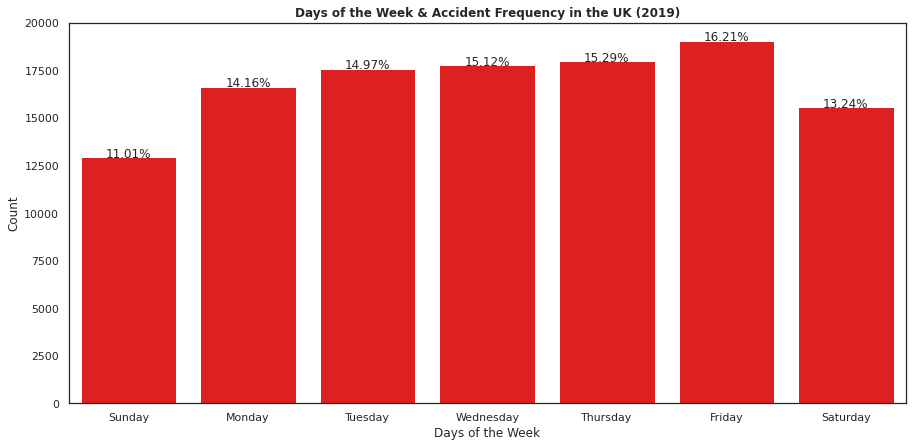

In [23]:
#We use a bar chart to identifty the day with the highest record of accidents in the UK in 2019
sns.set(style="white")
plt.figure(figsize=(15, 7))
weekplot = sns.countplot(x='Day_of_Week',data = accident, color = 'red')
weekplot.set(xlabel='Days of the Week', ylabel='Count')
for p in weekplot.patches: 
    height = p.get_height() 
    weekplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(accident))*100)+'%',  
      ha="center") 
weekplot.set(xticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Days of the Week & Accident Frequency in the UK (2019)', fontweight='bold')
plt.show()

>*The chart above shows that most of the accidents recorded in the UK in 2019 happened on Fridays. This contributed to 16.12% of total occurences. Next to this is Thursday with 15.29% of total occurences.*

**Question 2: Are there significant hours of the day on which accidents occur?**

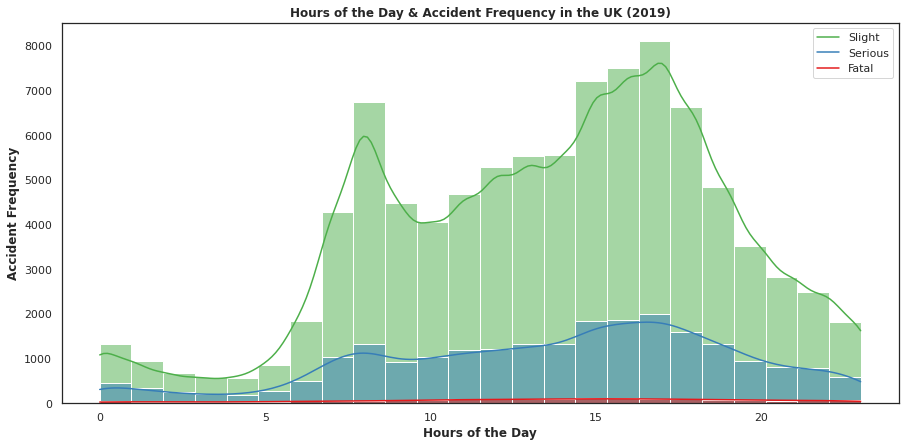

In [24]:
plt.figure(figsize=(15,7))
sns.histplot(data = accident, x='Acc_Hour', hue ='Accident_Severity', bins=24, kde=True, palette = 'Set1')
plt.xlabel('Hours of the Day', fontweight='bold')
plt.ylabel('Accident Frequency',fontweight='bold')
plt.title('Hours of the Day & Accident Frequency in the UK (2019)', fontweight='bold')
plt.legend(['Slight', 'Serious','Fatal'])
plt.show()

>*The chart above shows that most of the accidents recorded in the UK in 2019 happened in the 17th hour. There was also significant occurence in the 16th hour. The chart also categorizes the occurence of accidents based on severity. We can see that most of the accidents that occured are categorized as slight while the ones classified as fatal have minimal occurences.*

**Question 3(i): Are there significant months of the year on which accidents occur?**

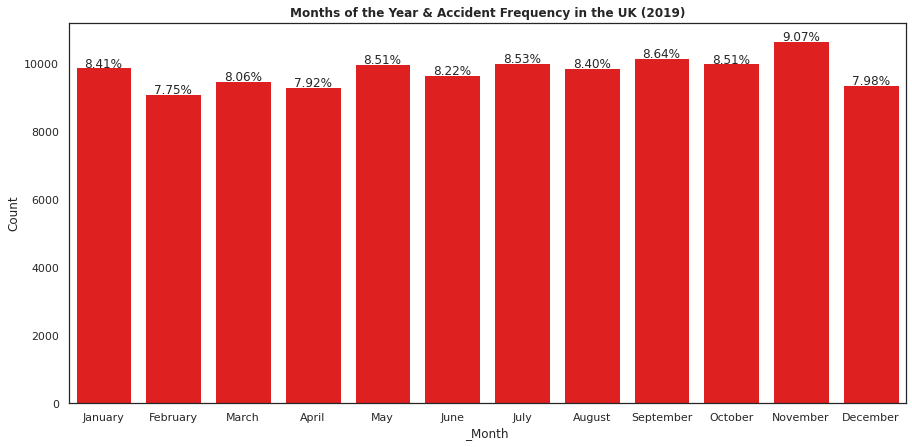

In [25]:
sns.set(style="white")
plt.figure(figsize=(15,7))
monthplot = sns.countplot(x = '_Month',data = accident, color = 'red')
monthplot.set(xlabel='_Month', ylabel='Count')
for p in monthplot.patches: 
    height = p.get_height() 
    monthplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(accident))*100)+'%',  
      ha="center") 
monthplot.set(xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Months of the Year & Accident Frequency in the UK (2019)', fontweight='bold')
plt.show()

>*From the chart above, we can see that most occurences of accidents in the UK in 2019 happened in November. Also, we had a significant occurence in September, 2019.*

**Question 3(ii)**

>*This analysis is a further drill down into the hour slight accidents happened the most in November, 2019 in the UK*

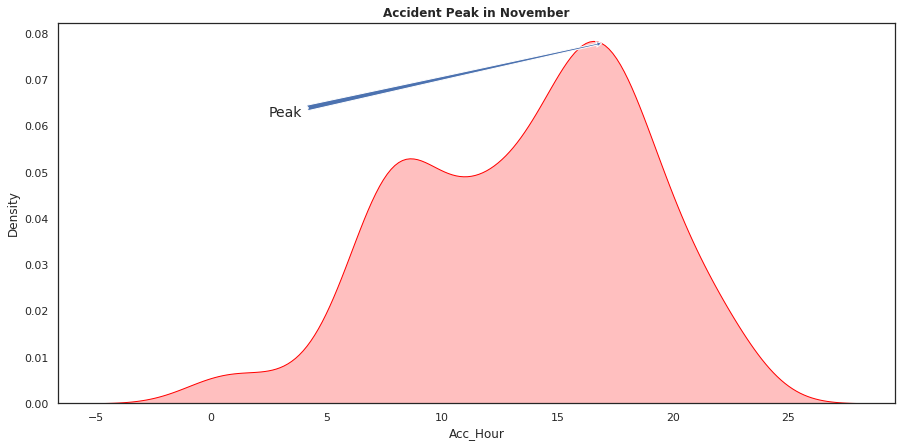

In [26]:
nov_fatal = accident[(accident['Accident_Severity'] == 3) & (accident['_Month'] == 11)]

fig,ax = plt.subplots(figsize=(15,7))
sns.kdeplot(nov_fatal["Acc_Hour"],fill=True, bw_adjust=2,color='red',data = nov_fatal);
plt.annotate('Peak',xy=(17,0.078),xytext=(2.5,0.062), arrowprops={'arrowstyle':'fancy'}, fontsize=14)
plt.title('Accident Peak in November', fontweight='bold')
plt.show()

>*The charts above show that most occurences of the slight accidents in November happened in the 17th hour. This drill down is consistent with the general overview we had about the hour most of the accidents recorded in 2019 happened in the UK.*

**Question 3(iii)**

>*This analysis is a further drill down into the exact day most accidents in November were recorded in the Uk in 2019*

In [27]:
nov_df = accident[accident["_Month"] == 11]

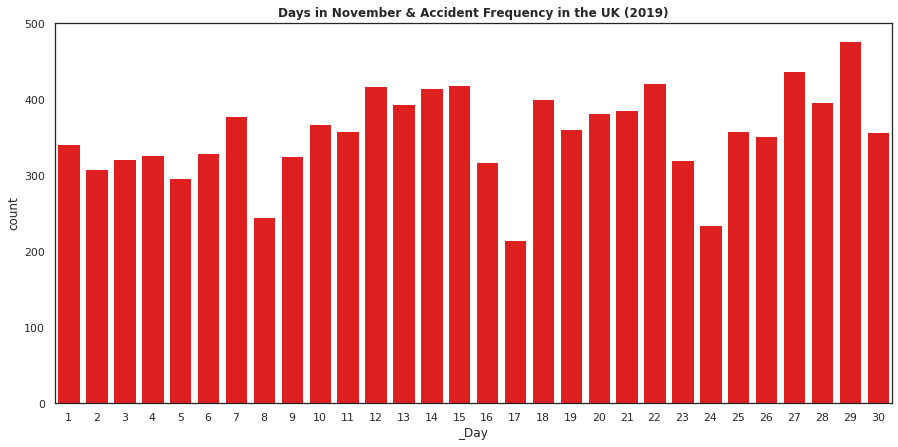

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x=nov_df['_Day'], color = 'red')
plt.title('Days in November & Accident Frequency in the UK (2019)', fontweight='bold')
plt.show()

>*In November 2019, most of the accidents recorded in the UK happened on the 29th. A google search showed that there was a terrorist attack on London bridge on that particular day. We will do a further drill down by checking the location where most of these accidents happen to confirm if the spike can be attributed to the attack.*

In [29]:
nov_day_29 = nov_df[nov_df["_Day"] == 29]

In [30]:
##using geopandas to get the coordinates of the locations where accidents happened on Nov 29
geometry = gpd.points_from_xy(nov_day_29.Longitude, nov_day_29.Latitude)
geo_novday29 = gpd.GeoDataFrame(nov_day_29[['Latitude', 'Longitude']], geometry = geometry)

In [31]:
#Plotting a heatmap of the accident locations in the UK in November, 29
map_novday29 = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_novday29.geometry ]

plugins.HeatMap(heat_data).add_to(map_novday29)

map_novday29

>*The heatmap shows we have a fairly higher concentration of accident occurences around the London area on the 29th of November. It's possible the attack contributed to the number of occurences or it's as a result of the population density in the region.*

**Question 4**
>*What are the variables with the most and least correlation to accident severity?*

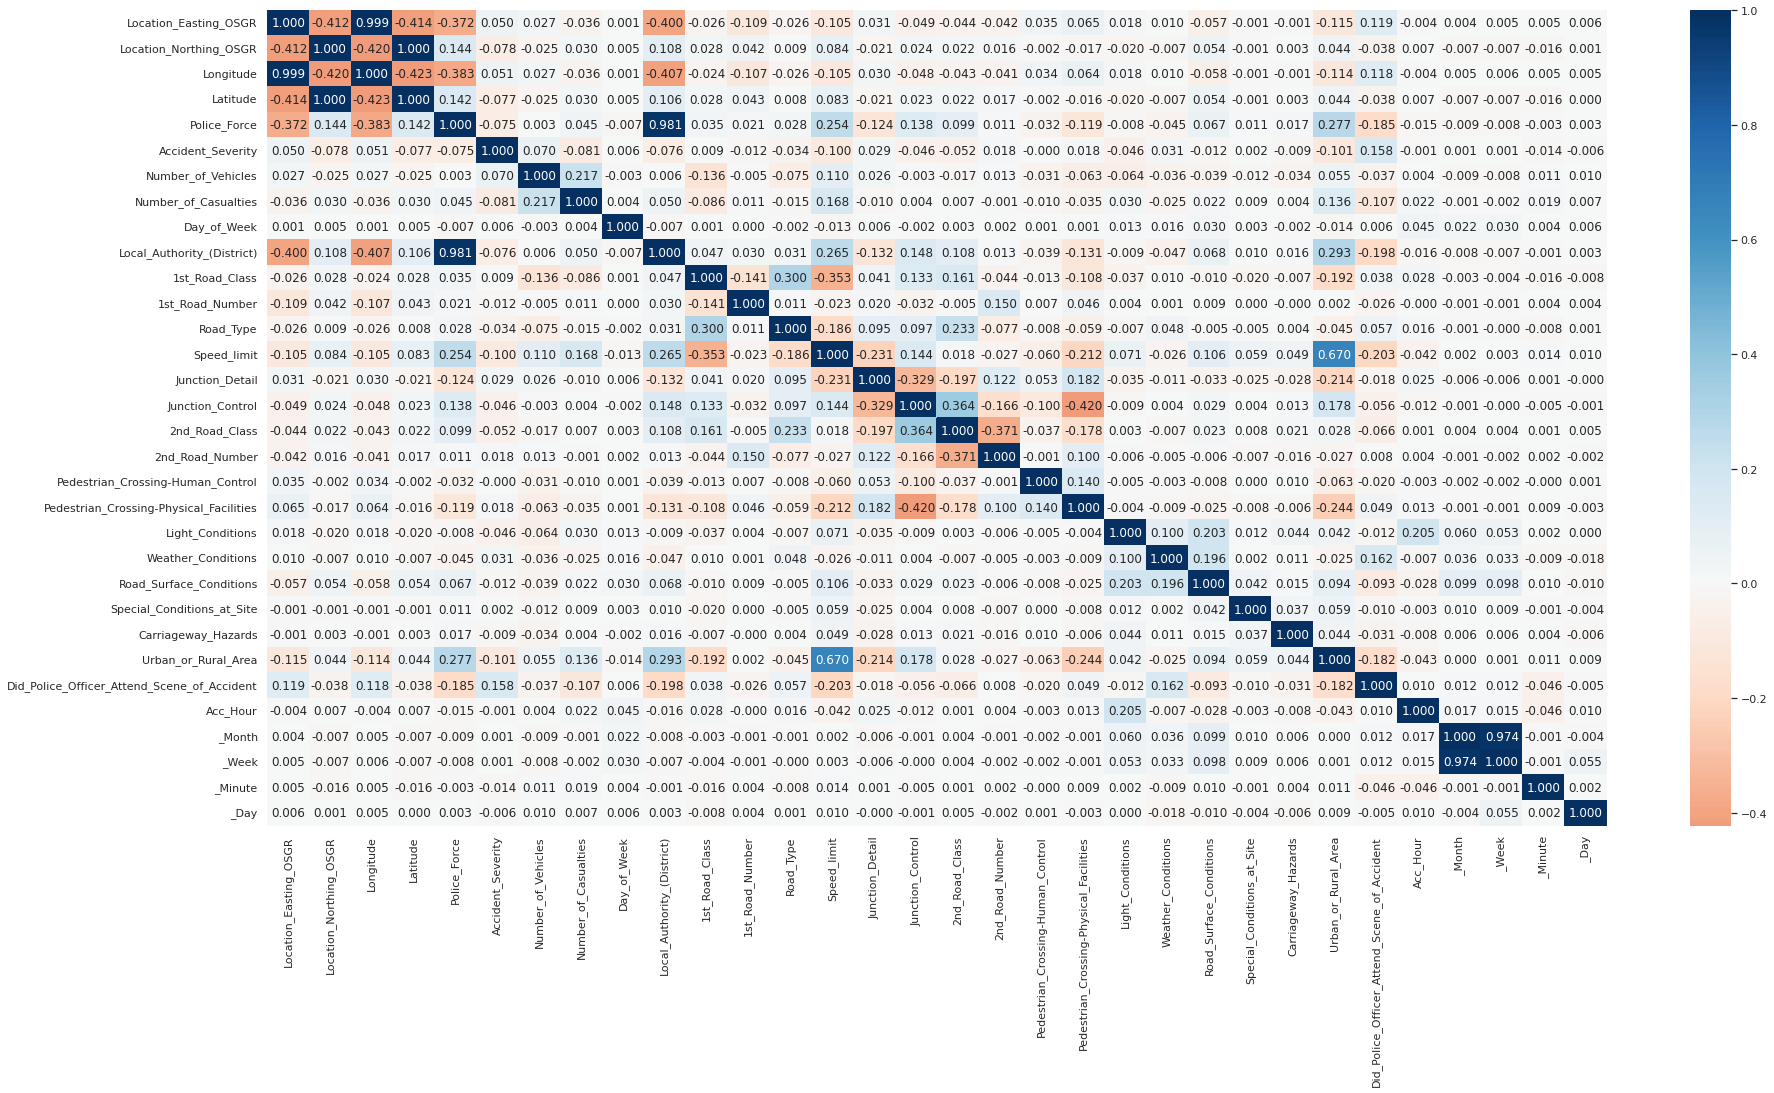

In [32]:
accident_corr = accident.corr()
fig, ax =  plt.subplots()
fig.set_size_inches(30,15)
sns.heatmap(accident_corr, annot = True, fmt = ".3f", cmap = "RdBu", center = 0, ax = ax)
plt.show()

>*The correlelation maxtrix above shows that "Did_Police_Officer_Attend_Scene_of_Accident" has the highest correlation score with Accident_Severity. This could be attributed to the fact that prompt emergency responses could reduce the fatality of an accident and in some cases, lives are saved when accident victims get quick help. The variable Urban_or_Rural_Area has the least correlation with Accident_Severity.*

**Question 5: For motorbikes, are there significant hours of the day on which accidents occur?**

In [33]:
##Merging Accident data with vehicle data
av = pd.merge(accident, vehicle, on = ['Accident_Index'], how = 'inner') #Using inner join to capture only unique accidents recorded both in the accident and vehicle data.

In [34]:
#Using the variable lookup, the following represent motorbikes:
Motorcycle50cc_and_under = av.Vehicle_Type == 2
Motorcycle_125cc_and_under = av.Vehicle_Type == 3
Motorcycle_over_125cc_and_up_to_500cc = av.Vehicle_Type == 4
Motorcycle_over_500cc = av.Vehicle_Type == 5
Electric_motorcycle = av.Vehicle_Type == 23
Motorcycle_unknown_cc = av.Vehicle_Type == 97

motorbikes = av.query('@Motorcycle50cc_and_under or @Motorcycle_125cc_and_under or @Motorcycle_over_125cc_and_up_to_500cc or @Motorcycle_over_500cc or @Electric_motorcycle or @Motorcycle_unknown_cc')

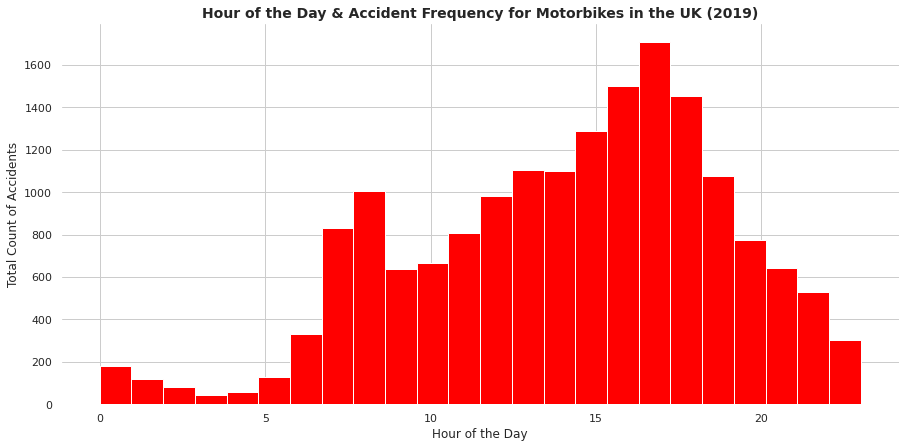

In [35]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,7))
motorbikes.Acc_Hour.hist(bins=24, ax=ax, color="red")
ax.set_title('Hour of the Day & Accident Frequency for Motorbikes in the UK (2019)', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents' )
sns.despine(top=True, right=True, left=True, bottom=True);

>*The chart above shows that most of the accidents recorded for Motorbikes also happen in the 17th Hour, followed by the significant occurence in the 16th hour as well.*

**Question 6: For Motorbikes, are there significant days of the week on which accidents occur?**

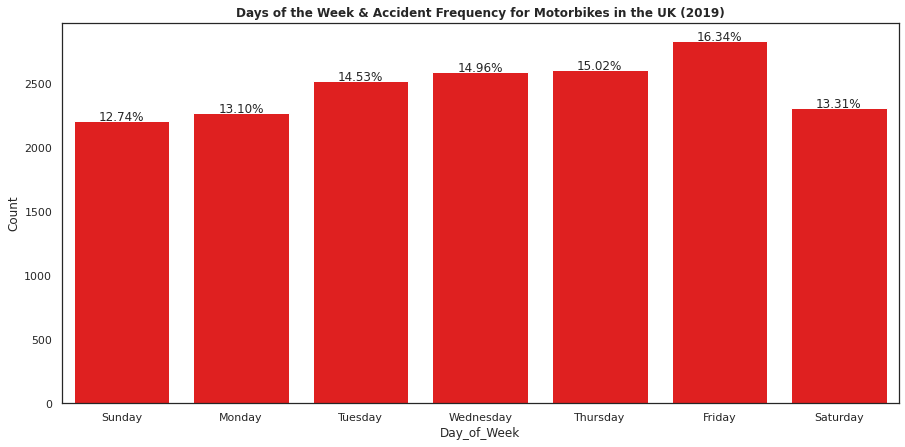

In [36]:
sns.set(style="white")
plt.figure(figsize=(15,7))
weekplot = sns.countplot(x='Day_of_Week',data = motorbikes, color = 'red')
weekplot.set(xlabel='Day_of_Week', ylabel='Count')
for p in weekplot.patches: 
    height = p.get_height() 
    weekplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(motorbikes))*100)+'%',  
      ha="center") 
weekplot.set(xticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Days of the Week & Accident Frequency for Motorbikes in the UK (2019)', fontweight='bold')
plt.show()

*The chart above shows we have very high occurence of motorbike accidents on Fridays. This is also followed by a significant occurence on Thursday. These occurences increased between Tuesday and Friday of the week in 2019.*

**Question 7: For Motorbikes, which type of motorbike has the highest occurence of accident?**

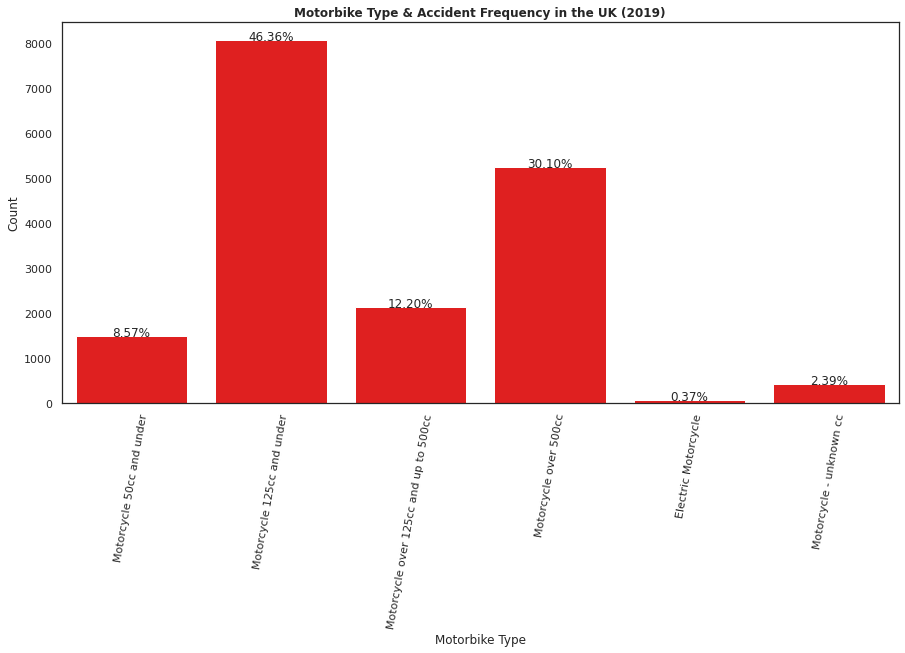

In [37]:
sns.set(style="white")
plt.figure(figsize=(15,7))
motorbikes_plot = sns.countplot(x='Vehicle_Type',data = motorbikes, color = 'red')
motorbikes_plot.set(xlabel="Motorbike Type", ylabel='Count')
for p in motorbikes_plot.patches: 
    height = p.get_height() 
    motorbikes_plot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(motorbikes))*100)+'%',  
      ha="center") 
motorbikes_plot.set(xticklabels=["Motorcycle 50cc and under", "Motorcycle 125cc and under", "Motorcycle over 125cc and up to 500cc", "Motorcycle over 500cc", "Electric Motorcycle", "Motorcycle - unknown cc"])
plt.xticks(rotation=80)
plt.title('Motorbike Type & Accident Frequency in the UK (2019)', fontweight='bold')
plt.show()

>*The chart above shows that Motorcycle 125cc and under represented as 3 in the data has the highest occurence of motorbikes accidents in the UK in 2019. This is followed by Motorcycle over 500cc represented as 5*

**Question 8: For motorbikes, are there significant months of the year on which accidents occur?**

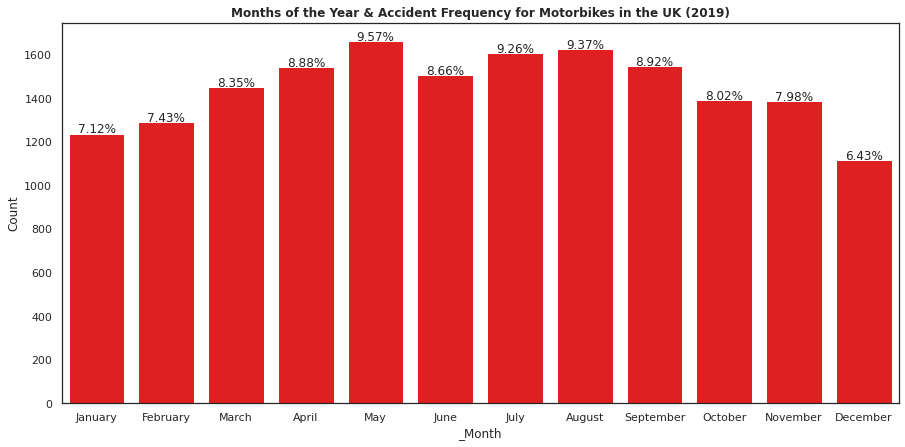

In [38]:
sns.set(style="white")
plt.figure(figsize=(15,7))
monthplot = sns.countplot(x = '_Month',data = motorbikes, color = 'red')
monthplot.set(xlabel='_Month', ylabel='Count')
for p in monthplot.patches: 
    height = p.get_height() 
    monthplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(motorbikes))*100)+'%',  
      ha="center") 
monthplot.set(xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Months of the Year & Accident Frequency for Motorbikes in the UK (2019)', fontweight='bold')
plt.show()

>*The chart above shows most of the accidents recorded for Motorbikes happen in May. There are significant occurences in August and July in 2019.*

**Question 9: For pedestrians involved in accidents, are there significant hours of the day and days of the week, on which they are more liekly to be involved in accidents?**

>*To get the significant hours of the day and day of the week on which accidents occur for pedestrians, we merge the accident data with the casualty data using the accident index as the primary key. Under casualty data, we have the pedestrain location which will be used for the analysis.*

In [39]:
##Merging Accident data with the Casualty data
df_ped = pd.merge(accident, casualty, on = ['Accident_Index'], how = 'inner') #Using inner join to capture only unique accidents recorded in the accident and casualty data.
pedestrians = df_ped.query('Pedestrian_Location != 0') #We select actual pedestrians

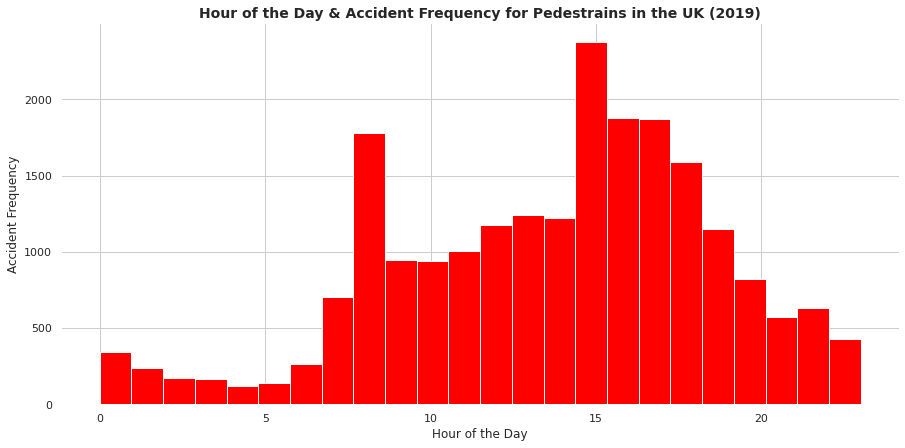

In [40]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,7))
pedestrians.Acc_Hour.hist(bins=24, ax=ax, color="red")
ax.set_title('Hour of the Day & Accident Frequency for Pedestrains in the UK (2019)', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Accident Frequency' )
sns.despine(top=True, right=True, left=True, bottom=True);

>*The chart above shows most pedestrian accident occur in the 15th hour of the day, followed by the 16th and 17th hour.*

**Question 10: For pedestrians involved, are there significant days of the week, on which they are more likely to be involved in accidents?**

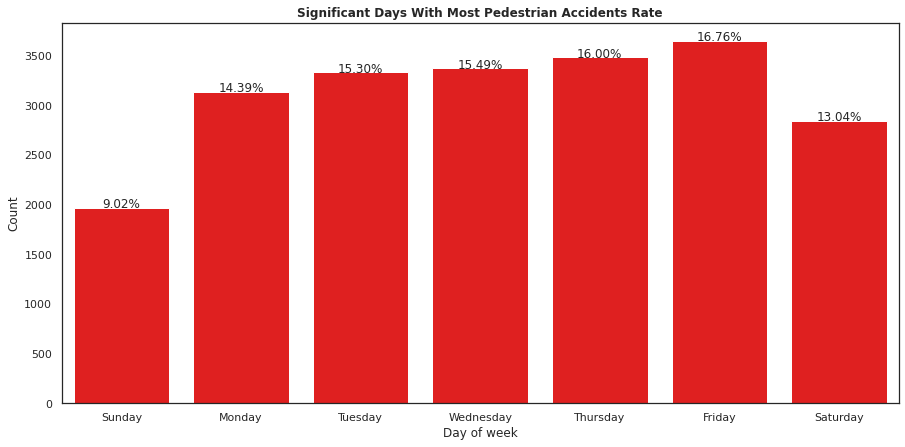

In [41]:
sns.set(style="white")
plt.figure(figsize=(15,7))
weekplot = sns.countplot(x='Day_of_Week',data=pedestrians, color ='red')
weekplot.set(xlabel='Day of week', ylabel='Count')
for p in weekplot.patches: 
    height = p.get_height() 
    weekplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(pedestrians))*100)+'%',  
      ha="center") 
weekplot.set(xticklabels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Significant Days With Most Pedestrian Accidents Rate', fontweight='bold')
plt.show()

>*For Pedestrains, most of the accidents that happen are recorded on Fridays. A significant number of occurences are also recorded on Thursdays.*

**Question 11: What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?**


>*Note: Daylight saving time 2019 in the United Kingdom began at 1:00AM on Sunday, March 31 and ended at 2:00AM on Sunday, October 27, 2019. This time frame was gotten from a google search*

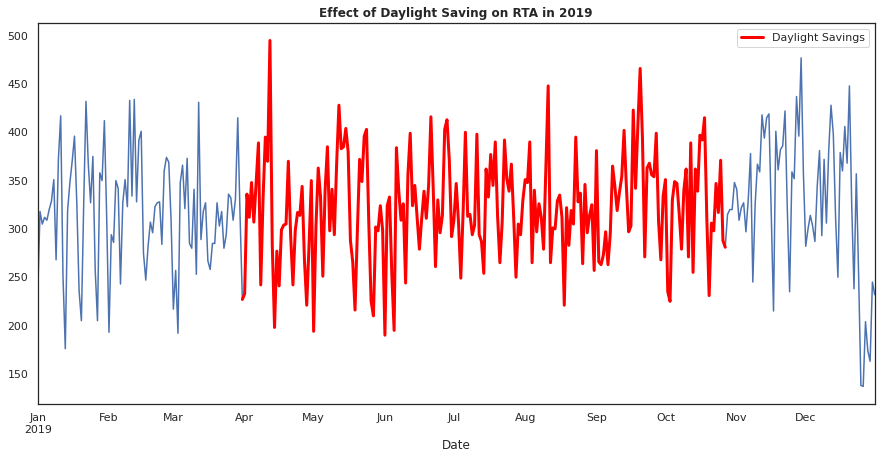

In [42]:
accident.groupby(['Date'])['Accident_Index'].count().plot(legend = False)
##Dayligt saving period
accident.loc[accident.Date.between('2019-03-31', '2019-10-27')].groupby(['Date'])['Accident_Index'].count().plot(legend = True, cmap= plt.cm.autumn,label = 'Daylight Savings', figsize=(15,7), linewidth = 3) 
plt.title('Effect of Daylight Saving on RTA in 2019', fontweight='bold')
plt.show()

>*The chart above with the **dark red** line represents the period when daylight savings was observed in the UK in 2019 while the line in **light-blue** represent all timeframes from January to December. It is seen that there was one major spike in the number of accidents recorded per day at the early stage of the daylight saving period. Also, there were two other spikes recorded that were beyond the usual accident frequency levels of other periods before the last quarter. With these observations, we can consider daylight saving to have some effect on the number of accidents especially a week after it began.* 

**Question 12: What impact, if any, does sunrise and sunset have on road traffic accidents?**

>*Using sunrise and sunset data for London (UK) provided on https://www.sunrise-and-sunset.com/en/sun/united-kingdom/bristol, the average sunrise time is 6:27 and the average sunset time is 18:41.*

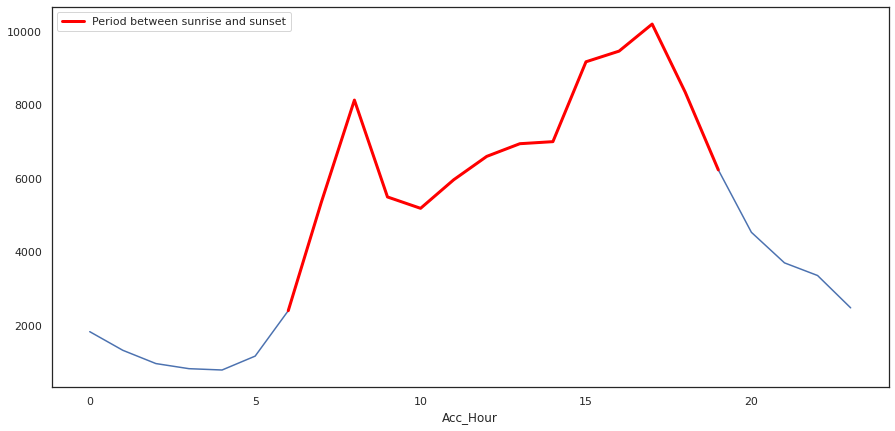

In [43]:
#Grouping the hour and accident index column to get impact of sunrise and sunset.
accident.groupby(['Acc_Hour'])['Accident_Index'].count().plot(legend = False)
accident.loc[accident.Acc_Hour.between(6, 19)].groupby(['Acc_Hour'])['Accident_Index'].count().plot(legend = True,figsize=(15,7),linewidth = 3, cmap= plt.cm.autumn,label = 'Period between sunrise and sunset')
plt.show()

>*From the graph above, sunrise time was pegged to 6th hour while sunset time to the 19th hour. During this period, we can see a steady rise in the number of road accidents as the day progressed. The highest number of accidents recorded was also between sunrise and sunset. This clearly shows that sunrise and sunset had a high significance on road accidents in the UK in 2019*

**Question 13: How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?**

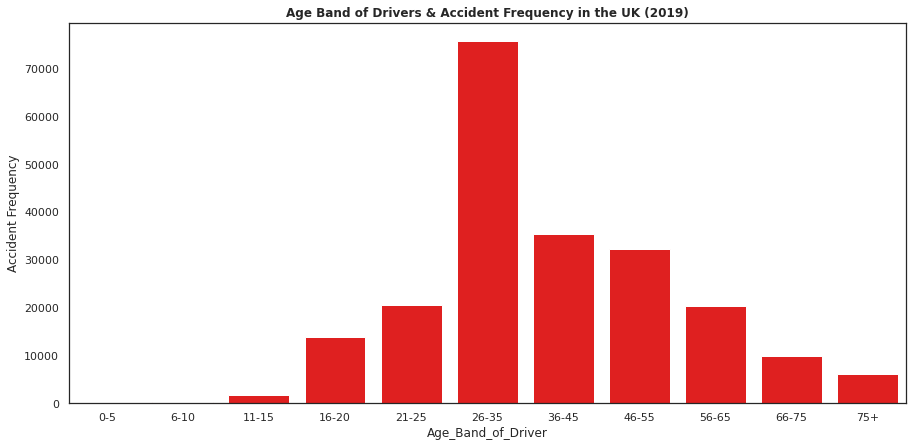

In [44]:
sns.set(style="white")
plt.figure(figsize=(15,7))
ageplot = sns.countplot(x = 'Age_Band_of_Driver',data = vehicle, color = 'red')
ageplot.set(xlabel='Age_Band_of_Driver', ylabel='Accident Frequency')
ageplot.set(xticklabels=['0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+'])
plt.title('Age Band of Drivers & Accident Frequency in the UK (2019)', fontweight='bold')
plt.show()

>*The chart above shows that drivers within the age band 26-35 experienced the most significant number of cases of accidents in the UK in 2019; followed by drivers within the age band 36-45.*

**Question 14:Can we predict the hour accident will occur in the UK?**

In [45]:
#Merging the vehicle, casualty and accident data
vc = pd.merge(vehicle, casualty, on = ['Accident_Index', 'Vehicle_Reference'], how = 'inner')
avc = pd.merge(accident, vc, on = ['Accident_Index'], how = 'inner')

In [46]:
#Creating copies of avc data for different modelling
df_avc1 = avc.copy() 
df_avc2 = avc.copy() 

In [47]:
avc.shape #The merged data have 109,518 rows and 73 columns which is sufficient enough to build our models.

(153158, 74)

Feature Selection by Eliminating Categorical Variables & Using Backward Selection Method

In [48]:
drop_col = avc.select_dtypes('object').columns

In [49]:
avc = avc.drop(drop_col, axis=1) #Drop categorical features
avc.drop(['Date'], axis = 1, inplace = True) #Drop date column

In [50]:
X = avc.drop('Acc_Hour', axis=1) #Independent variables
y = avc['Acc_Hour'] #Dependent variable

In [51]:
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [52]:
#backward elimination using linear regression
def train_model(variables):
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    return AIC_score(y_train, model.predict(X_train[variables]), model)

best_model, best_variables = backward_elimination(X_train.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude, Police_Force, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Day_of_Week, Local_Authority_(District), 1st_Road_Class, 1st_Road_Number, Road_Type, Speed_limit, Junction_Detail, Junction_Control, 2nd_Road_Class, 2nd_Road_Number, Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities, Light_Conditions, Weather_Conditions, Road_Surface_Conditions, Special_Conditions_at_Site, Carriageway_Hazards, Urban_or_Rural_Area, Did_Police_Officer_Attend_Scene_of_Accident, _Month, _Week, _Minute, _Day, Vehicle_Reference, Vehicle_Type, Towing_and_Articulation, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane, Junction_Location, Skidding_and_Overturning, Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, Was_Vehicle_Left_Hand_Drive?, Journey_Purpose_of_Driver, Sex_of_Driver, Age_of_Driver, Age_Band_of_Driver, Engine_Capacity_(CC), Propul

>*The best predictors for the hour an accident will happen after using the backward elimination method for feature selection are highlighted in the list above*

In [53]:
predictors = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Accident_Severity', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', '_Month', '_Minute', 'Vehicle_Reference', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', 'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code', 'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty', 'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker', 'Casualty_Home_Area_Type', 'Casualty_IMD_Decile']
outcome = ['Acc_Hour']

In [54]:
X = avc[predictors] #Independent variables
y = avc[outcome] #Dependent variable

In [55]:
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [56]:
#using XGBoost with default parameters to train our model
model = XGBRegressor() 

In [57]:
model.fit(X_train,y_train)

[10:07:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [58]:
y_pred=model.predict(X_test)

In [59]:
##Evaluation metric
print(mean_absolute_error(y_test, y_pred)) 

3.7972587080841183


Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. The MAE score fror the model is 3.80.

In [60]:
y_pred_ = pd.DataFrame(y_pred)[0].round(0).value_counts()
y_pred_

13.0    15397
14.0     9812
12.0     7378
17.0     3549
15.0     3190
16.0     2784
11.0     2456
18.0      917
10.0      262
9.0        93
8.0        69
19.0       30
7.0        10
6.0         1
Name: 0, dtype: int64

>*Our model predicts that most of the accidents will happen in the 13th hour of the day*

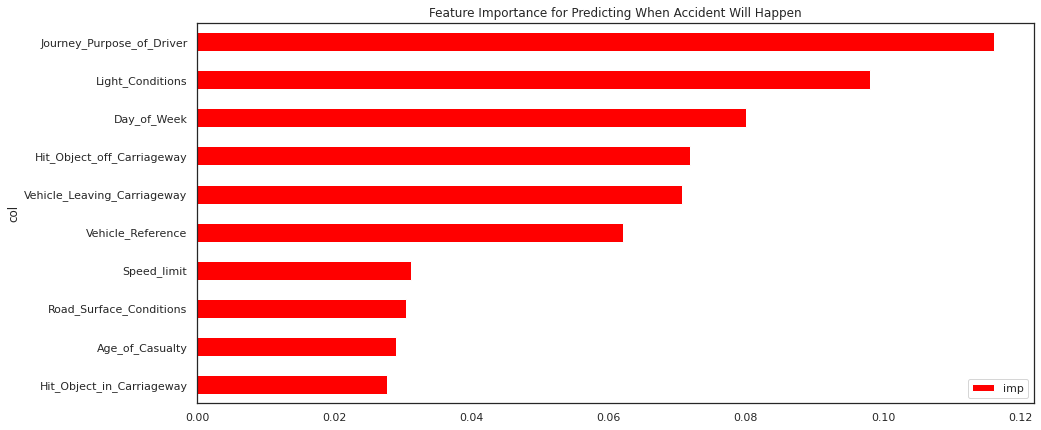

In [61]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(15, 7), color = 'red')
plt.title('Feature Importance for Predicting When Accident Will Happen')
plt.show()

>*The purpose for which the driver is travelling is the most important feature for predicting the hour an accident will occur*

**Question 15: Can we predict where accidents will happen?**

Predicting the latititude coordinate for places where accidents are likely to happen

>*Feature selection by Eliminating Categorical Variables & Using Forward Selection Method*

In [62]:
drop_col = df_avc1.select_dtypes('object').columns

In [63]:
df_avc1 = df_avc1.drop(drop_col, axis=1)

###dropping the date column in the data because we have already split date into month, week and day. We also drop Longitude, Location_Easting_OSGR and Location_Northing_OSGR to avoid data leakage in our model.
df_avc1.drop(['Date', 'Longitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR'], axis = 1, inplace = True)

In [64]:
X = df_avc1.drop('Latitude', axis=1) #predictors
y = df_avc1['Latitude'] #target variable

In [65]:
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
#forward selection using linear regression
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)
                     
best_model, best_variables = forward_selection(X_train.columns, train_model, score_model, verbose = True)

print(best_variables) 

Variables: Police_Force, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Day_of_Week, Local_Authority_(District), 1st_Road_Class, 1st_Road_Number, Road_Type, Speed_limit, Junction_Detail, Junction_Control, 2nd_Road_Class, 2nd_Road_Number, Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities, Light_Conditions, Weather_Conditions, Road_Surface_Conditions, Special_Conditions_at_Site, Carriageway_Hazards, Urban_or_Rural_Area, Did_Police_Officer_Attend_Scene_of_Accident, Acc_Hour, _Month, _Week, _Minute, _Day, Vehicle_Reference, Vehicle_Type, Towing_and_Articulation, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane, Junction_Location, Skidding_and_Overturning, Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, Was_Vehicle_Left_Hand_Drive?, Journey_Purpose_of_Driver, Sex_of_Driver, Age_of_Driver, Age_Band_of_Driver, Engine_Capacity_(CC), Propulsion_Code, Age_of_Vehicle, Driver_IMD_Decile, Driver_Home_

>*The best predictors for predicting the latitude coordinate of where an accident will happen after using the forward elimination method for feature selection are highlighted in the list above*

In [67]:
predictors = ['Police_Force', 'Local_Authority_(District)', 'Casualty_IMD_Decile', 'Speed_limit', '1st_Road_Class', 'Accident_Severity', 'Vehicle_Reference', 'Casualty_Class', 'Road_Surface_Conditions', '_Month', 'Driver_IMD_Decile', 'Age_of_Vehicle', 'Vehicle_Leaving_Carriageway', '1st_Road_Number', 'Age_of_Driver', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Weather_Conditions', 'Casualty_Type', 'Casualty_Reference', 'Number_of_Casualties', 'Was_Vehicle_Left_Hand_Drive?', 'Light_Conditions', 'Pedestrian_Movement', 'Propulsion_Code', 'Driver_Home_Area_Type', 'Pedestrian_Location', 'Engine_Capacity_(CC)', '1st_Point_of_Impact', 'Urban_or_Rural_Area', 'Age_Band_of_Driver', '2nd_Road_Number', 'Journey_Purpose_of_Driver', 'Acc_Hour', 'Number_of_Vehicles', 'Car_Passenger', 'Pedestrian_Road_Maintenance_Worker', 'Skidding_and_Overturning', 'Sex_of_Casualty', '_Minute', 'Bus_or_Coach_Passenger', 'Casualty_Severity', 'Pedestrian_Crossing-Physical_Facilities', 'Special_Conditions_at_Site', 'Towing_and_Articulation', 'Sex_of_Driver', 'Casualty_Home_Area_Type', 'Junction_Detail', 'Junction_Location', 'Pedestrian_Crossing-Human_Control']
outcome = ['Latitude']

In [68]:
X = df_avc1[predictors]
y = df_avc1[outcome]

In [69]:
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:
model = LGBMRegressor(reg_alpha=10, reg_lambda=10)  #we train our model with LGBMRegressor and we specify few parameters

In [71]:
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)])

[1]	training's l2: 1.51753	valid_1's l2: 1.54421
[2]	training's l2: 1.23576	valid_1's l2: 1.25784
[3]	training's l2: 1.00716	valid_1's l2: 1.02517
[4]	training's l2: 0.821619	valid_1's l2: 0.836299
[5]	training's l2: 0.671093	valid_1's l2: 0.683287
[6]	training's l2: 0.548893	valid_1's l2: 0.558932
[7]	training's l2: 0.44966	valid_1's l2: 0.458025
[8]	training's l2: 0.36906	valid_1's l2: 0.375994
[9]	training's l2: 0.30353	valid_1's l2: 0.309427
[10]	training's l2: 0.250238	valid_1's l2: 0.255118
[11]	training's l2: 0.207028	valid_1's l2: 0.211223
[12]	training's l2: 0.171766	valid_1's l2: 0.17528
[13]	training's l2: 0.143155	valid_1's l2: 0.146181
[14]	training's l2: 0.119864	valid_1's l2: 0.122466
[15]	training's l2: 0.100938	valid_1's l2: 0.103222
[16]	training's l2: 0.0854176	valid_1's l2: 0.0874102
[17]	training's l2: 0.0727499	valid_1's l2: 0.0745382
[18]	training's l2: 0.0624494	valid_1's l2: 0.0640543
[19]	training's l2: 0.0539718	valid_1's l2: 0.0553963
[20]	training's l2: 0.0

LGBMRegressor(reg_alpha=10, reg_lambda=10)

In [72]:
pred_lat=model.predict(X_test)

In [73]:
print(mean_absolute_error(y_test, pred_lat))  ##Evaluation metric

0.06516128556150853


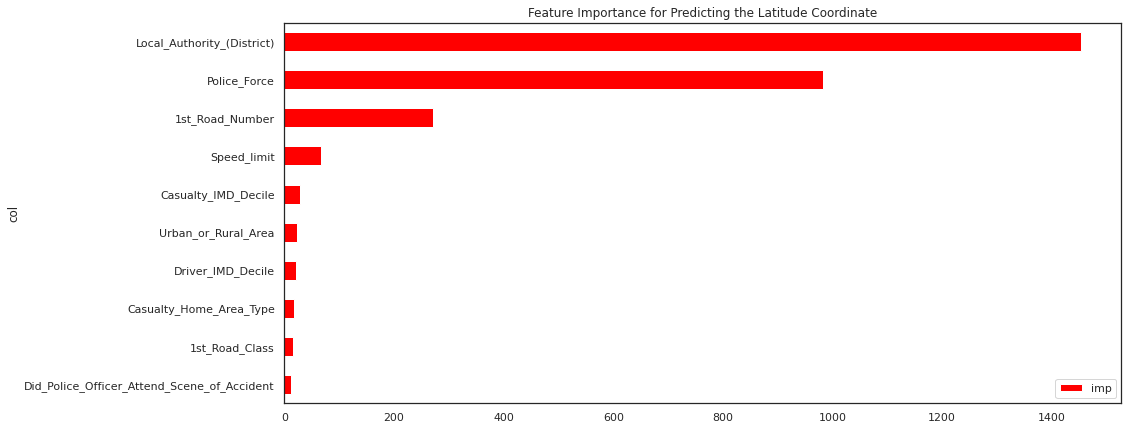

In [74]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(15, 7), color = 'red')
plt.title('Feature Importance for Predicting the Latitude Coordinate')
plt.show()

>*The Local_Authority_(District) is the most important feature for predicting the latitude of where an accident will occur.*

In [75]:
#turn our predictions to a dataframe
pred_lat_loc = pd.DataFrame(pred_lat, columns = ['Latitude'])
pred_lat_loc['Column_Idx'] = pred_lat_loc.index

In [76]:
pred_lat_loc

,Latitude,Column_Idx
0,51.470871,0
1,52.643708,1
2,50.952593,2
3,53.434846,3
4,51.292006,4
...,...,...
45943,51.948797,45943
45944,55.734392,45944
45945,51.337912,45945
45946,51.551265,45946


Predicting the latititude coordinate for places where accidents are likely to happen...

>*Feature Selection by Eliminating Categorical Variables & Using Forward Selection Method*

In [77]:
drop_col = df_avc2.select_dtypes('object').columns

In [78]:
### dropping the object features in the data because we don't want to expand the number of columns in the data so as to reduce the effect of curse of dimensionality which would happen if we one-hot encode the categorical features.
df_avc2 = df_avc2.drop(drop_col, axis=1)

###dropping all date and location variables
df_avc2.drop(['Date', 'Latitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR'], axis = 1, inplace = True)

In [79]:
X = df_avc2.drop('Longitude', axis=1) #independent variables
y = df_avc2['Longitude'] #dependent variable

In [80]:
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
#forward selection using linear regression
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)
                     
best_model, best_variables = forward_selection(X_train.columns, train_model, score_model, verbose = True)

print(best_variables) 

Variables: Police_Force, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Day_of_Week, Local_Authority_(District), 1st_Road_Class, 1st_Road_Number, Road_Type, Speed_limit, Junction_Detail, Junction_Control, 2nd_Road_Class, 2nd_Road_Number, Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities, Light_Conditions, Weather_Conditions, Road_Surface_Conditions, Special_Conditions_at_Site, Carriageway_Hazards, Urban_or_Rural_Area, Did_Police_Officer_Attend_Scene_of_Accident, Acc_Hour, _Month, _Week, _Minute, _Day, Vehicle_Reference, Vehicle_Type, Towing_and_Articulation, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane, Junction_Location, Skidding_and_Overturning, Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, Was_Vehicle_Left_Hand_Drive?, Journey_Purpose_of_Driver, Sex_of_Driver, Age_of_Driver, Age_Band_of_Driver, Engine_Capacity_(CC), Propulsion_Code, Age_of_Vehicle, Driver_IMD_Decile, Driver_Home_

In [82]:
predictors = ['Local_Authority_(District)', 'Police_Force', 'Casualty_IMD_Decile', '1st_Road_Number', '_Month', 'Driver_Home_Area_Type', 'Hit_Object_off_Carriageway', 'Vehicle_Reference', 'Casualty_Class', 'Road_Surface_Conditions', 'Age_of_Vehicle', 'Journey_Purpose_of_Driver', 'Age_of_Driver', 'Driver_IMD_Decile', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Pedestrian_Crossing-Physical_Facilities', 'Junction_Detail', 'Propulsion_Code', 'Number_of_Casualties', '2nd_Road_Class', 'Was_Vehicle_Left_Hand_Drive?', 'Vehicle_Location-Restricted_Lane', 'Light_Conditions', 'Pedestrian_Location', 'Pedestrian_Movement', 'Pedestrian_Crossing-Human_Control', '1st_Point_of_Impact', '1st_Road_Class', 'Casualty_Type', 'Skidding_and_Overturning', 'Acc_Hour', 'Junction_Control', 'Speed_limit', '2nd_Road_Number', 'Casualty_Home_Area_Type', 'Age_Band_of_Driver', 'Casualty_Severity', '_Minute', 'Casualty_Reference', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Bus_or_Coach_Passenger', 'Engine_Capacity_(CC)', 'Pedestrian_Road_Maintenance_Worker', 'Vehicle_Type', 'Number_of_Vehicles', '_Week', 'Carriageway_Hazards', 'Age_of_Casualty', 'Car_Passenger']
outcome = ['Longitude']

In [83]:
X = df_avc2[predictors]
y = df_avc2[outcome]

In [84]:
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [85]:
model= LGBMRegressor(reg_alpha=10, reg_lambda=10)

In [86]:
model.fit(X_train, y_train,eval_set=[(X_train,y_train),(X_test, y_test)])

[1]	training's l2: 1.61021	valid_1's l2: 1.63146
[2]	training's l2: 1.31917	valid_1's l2: 1.33688
[3]	training's l2: 1.08308	valid_1's l2: 1.09775
[4]	training's l2: 0.891551	valid_1's l2: 0.90369
[5]	training's l2: 0.736228	valid_1's l2: 0.7462
[6]	training's l2: 0.609884	valid_1's l2: 0.618205
[7]	training's l2: 0.507272	valid_1's l2: 0.514227
[8]	training's l2: 0.423989	valid_1's l2: 0.429803
[9]	training's l2: 0.355938	valid_1's l2: 0.360879
[10]	training's l2: 0.300741	valid_1's l2: 0.304924
[11]	training's l2: 0.255211	valid_1's l2: 0.258905
[12]	training's l2: 0.218146	valid_1's l2: 0.221304
[13]	training's l2: 0.187914	valid_1's l2: 0.190711
[14]	training's l2: 0.163338	valid_1's l2: 0.16592
[15]	training's l2: 0.143298	valid_1's l2: 0.145624
[16]	training's l2: 0.126376	valid_1's l2: 0.128574
[17]	training's l2: 0.112205	valid_1's l2: 0.114255
[18]	training's l2: 0.100839	valid_1's l2: 0.102812
[19]	training's l2: 0.0913834	valid_1's l2: 0.0932472
[20]	training's l2: 0.0833354

LGBMRegressor(reg_alpha=10, reg_lambda=10)

In [87]:
pred_lon = model.predict(X_test)

In [88]:
print(mean_absolute_error(y_test, pred_lon))

0.11138352396249623


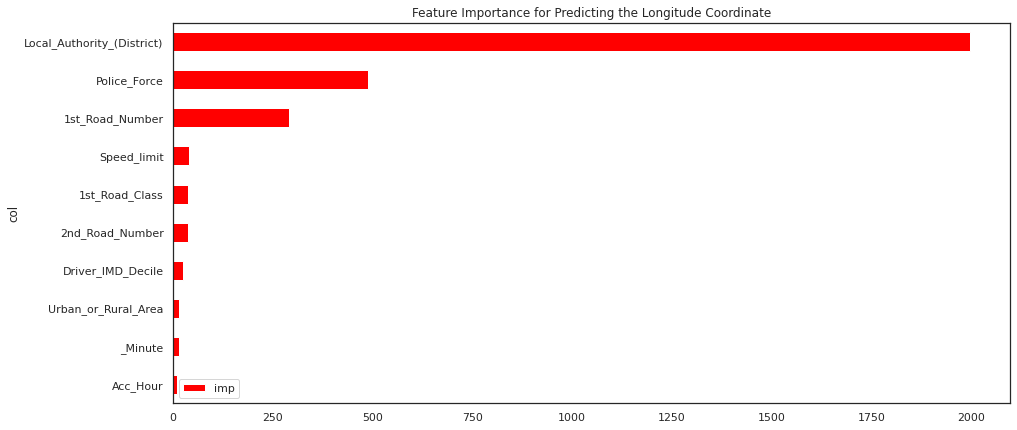

In [89]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(15, 7), color = 'red')
plt.title('Feature Importance for Predicting the Longitude Coordinate')
plt.show()

>*The Local_Authority_(District) is the most important feature for predicting the longitude of where an accident will occur.*

In [90]:
pred_lon_loc = pd.DataFrame(pred_lon, columns = ['Longitude'])
pred_lon_loc['Column_Idx'] = pred_lon_loc.index

In [91]:
 pred_lon_loc

,Longitude,Column_Idx
0,-0.343813,0
1,1.184662,1
2,-1.077053,2
3,-1.413187,3
4,-1.996930,4
...,...,...
45943,-0.376169,45943
45944,-4.351845,45944
45945,0.389873,45945
45946,-0.288057,45946


Accident Coordinates

In [92]:
accident_loc = pd.merge(pred_lat_loc, pred_lon_loc, on = ['Column_Idx']) #merging the latitude and longitude predictions
accident_location = accident_loc[['Column_Idx', 'Latitude', 'Longitude']]
accident_location.drop(['Column_Idx'], axis = 1, inplace = True)

In [93]:
accident_location

,Latitude,Longitude
0,51.470871,-0.343813
1,52.643708,1.184662
2,50.952593,-1.077053
3,53.434846,-1.413187
4,51.292006,-1.996930
...,...,...
45943,51.948797,-0.376169
45944,55.734392,-4.351845
45945,51.337912,0.389873
45946,51.551265,-0.288057


In [94]:
##using geopandas to get the coordinates of the locations where accidents happened on Nov 29
geometry = gpd.points_from_xy(accident_location.Longitude, accident_location.Latitude)
geo_predicted = gpd.GeoDataFrame(accident_location[['Latitude', 'Longitude']], geometry = geometry)

#Plotting a heatmap of the predicted accident locations in the UK in November, 29
map_predicted = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_predicted.geometry ]

plugins.HeatMap(heat_data).add_to(map_predicted)

map_predicted

>*The areas mapped out using the heatmap represent locations prone to accidents in the UK. Appriopriate measure should be taken by authorities to prioritize these locations and deploy resources necessary to prevent accidents. Areas with higher concentration should be given a special preference.*